> # 매개변수 튜닝하기

- 보다 높은 정답률이 필요한 경우 식별기도 중요하지만 하이퍼파라미터 튜닝 또한 괸장히 중요
- 여기서 **하이퍼파라미터란, 사람이 직접 설정해야 하는 매개변수**를 의미

___
> ## 그리드 서치

- 가장 단순명쾌한 하이퍼파라미터 튜닝 방법은 **그리드서치**로 알려져 있음
- 이는 여러 매개변수를 격자모양으로 결합하여 가장 정답률이 높은 것을 사용하는 방법임
- 예를 들어 SVM의 `C = [0.1, 1.0, 10.0]`, `gamma = [0.1, 0.5, 1.0]`으로 각각 3가지 종류를 두고 조합한다면 총 9개의 조합의 모델 비교가 가능
- 유방암 데이터세트를 사용하여 그리드서치하는 방법은 다음과 같음 (`sklearn.model_selection`의 `GridSearchCV` 사용)

In [12]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
# from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

In [4]:
# 데이터 호출
query = 'select * from testdataset.wdbc order by index'
dataset = pd.read_gbq(project_id = 'mlwithgcp', query = query)

# 문자 클래스 숫자로 변경
dataset['diagnostic'] = dataset['diagnostic'].apply(lambda X: 0 if X=='M' else 1)

# index열 제거
dataset.drop('index', axis = 1, inplace = True)

# array 변경
X_dataset = dataset.drop('diagnostic', axis = 1).as_matrix()
y_dataset = dataset.diagnostic.as_matrix()

# 정규화
scaler = MinMaxScaler()
X_dataset = scaler.fit_transform(X_dataset)

# 학습데이터 훈련데이터 분류
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset,
                                                   test_size = 0.2, random_state = 42)

Requesting query... ok.
Job ID: 2f0e2c87-1820-4295-8076-ed9317af65cd
Query running...
Query done.
Cache hit.

Retrieving results...
Got 569 rows.

Total time taken 2.08 s.
Finished at 2018-10-29 23:24:23.


In [5]:
from sklearn.model_selection import GridSearchCV

In [6]:
# 매개변수 정의
params = {'C': [0.1, 1.0, 10.0],
         'gamma': [0.1, 0.5, 1.0]}

# 학습기 인스턴스와 그리드 매개변수 전달
classifier = SVC()
gs = GridSearchCV(classifier, params)

# 그리드서치 실행
gs.fit(X_train, y_train)
gs.score(X_test,y_test)

0.9824561403508771

- 결과는 가장 정답률이 높은 98.2%만 반환
- `GridSearchCV`에서는 '학습기'와 '매개변수 범위'를 매개변수 입력값으로 받음
- 그리드서치 리스트를 확인하려면 `grid_scores_`로 결과값 확인 가능 (참조. `grid_scores_`는 deprecated되어 향후 `cv_scores_`로 대체)

In [10]:
gs.grid_scores_
#gs.cv_results_

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.87912, std: 0.01107, params: {'C': 0.1, 'gamma': 0.1},
 mean: 0.94725, std: 0.00509, params: {'C': 0.1, 'gamma': 0.5},
 mean: 0.95385, std: 0.00957, params: {'C': 0.1, 'gamma': 1.0},
 mean: 0.96044, std: 0.00541, params: {'C': 1.0, 'gamma': 0.1},
 mean: 0.97143, std: 0.00637, params: {'C': 1.0, 'gamma': 0.5},
 mean: 0.97363, std: 0.00943, params: {'C': 1.0, 'gamma': 1.0},
 mean: 0.97363, std: 0.00541, params: {'C': 10.0, 'gamma': 0.1},
 mean: 0.97582, std: 0.00834, params: {'C': 10.0, 'gamma': 0.5},
 mean: 0.97802, std: 0.00832, params: {'C': 10.0, 'gamma': 1.0}]

- 현재 조합에서는 `C = 10.0`, `gamma = 1.0`일때 가장 정답률 평균이 높고, 분산이 높지 않아 이 조합이 가장 좋은 매개변수라고 할 수 있음
- 가장 좋은 매개변수만 확인하고 싶을 때에는 `best_params_`를 사용

In [11]:
gs.best_params_

{'C': 10.0, 'gamma': 1.0}

___
>## 조합을 시각화하기

- 결과값이 숫자의 나열이기 때문에 히트맵을 사용하면 굉장히 편리할 수 있음
- 그리드서치의 범위를 늘린 후 매개변수 경향 확인

In [13]:
params = {'C': np.linspace(5, 50, 10),
         'gamma': np.linspace(0.01, 1.0, 10)}

gs = GridSearchCV(classifier, params)
gs.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([ 5., 10., 15., 20., 25., 30., 35., 40., 45., 50.]), 'gamma': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
pd.DataFrame(gs.cv_results_).head()

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003922,0.001736,0.949451,0.950549,5,0.01,"{'C': 5.0, 'gamma': 0.01}",100,0.954248,0.950331,0.953642,0.947368,0.940397,0.953947,0.000208,0.000045,0.006385,0.002690
1,0.002505,0.001045,0.975824,0.980205,5,0.12,"{'C': 5.0, 'gamma': 0.12}",5,0.980392,0.973510,0.966887,0.983553,0.980132,0.983553,0.000375,0.000049,0.006299,0.004734
2,0.002012,0.000886,0.975824,0.981309,5,0.23,"{'C': 5.0, 'gamma': 0.23}",5,0.980392,0.976821,0.966887,0.980263,0.980132,0.986842,0.000031,0.000026,0.006299,0.004157
3,0.001934,0.000874,0.973626,0.981309,5,0.34,"{'C': 5.0, 'gamma': 0.34}",19,0.980392,0.976821,0.966887,0.980263,0.973510,0.986842,0.000077,0.000023,0.005520,0.004157
4,0.001909,0.000969,0.973626,0.983502,5,0.45,"{'C': 5.0, 'gamma': 0.45}",19,0.980392,0.976821,0.960265,0.983553,0.980132,0.990132,0.000106,0.000165,0.009417,0.005434


- 그리드서치 결과값은 gs.cv_results_에 저장되어 있음
- `seaborn`을 사용하여 히트맵으로 표현

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python

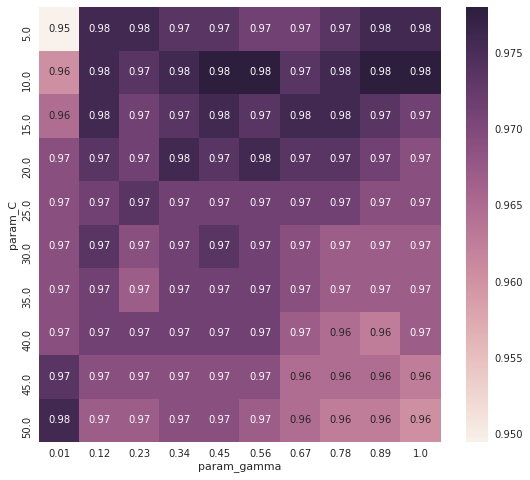

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# dict를 DataFrame으로 변환
df = pd.DataFrame(gs.cv_results_)

# C와 gamma의 mean_test_score로 매트릭스 행렬 만들기
hm = df.pivot('param_C', 'param_gamma', 'mean_test_score')

# 히트맵 그리기
plt.figure(figsize = (9,8))
sns.heatmap(hm, annot = True)

- 결과를 보면 `C = 10.0` 근처에서 정답률이 높게 나온다는 것을 확인 가능
- 한편, 'C'와 'gamma' 값이 모두 높은 경우 정답률이 잘 나오지 않음을 확인 가능
- 이를 통해 튜닝의 방향을 쉽게 잡아갈 수 있음

___
>## 랜덤 서치

- 그리드서치의 단점은, 조합 수만큼 학습을 반복해야하므로 데이터세트가 큰 경우에는 시간이 굉장히 오래 걸림
- 이때는 매개변수의 조합을 무작위로 추출하는 **랜덤서치**를 많이 사용
- `GridSearchCV` 대신 `RandomizedSearchCV`로 대체
- `RandomizedSearchCV`는 조합 중 무작위로 `n_iter`수만큼 선택한 뒤 학습 실행

In [26]:
from sklearn.model_selection import RandomizedSearchCV

params = {'C': np.linspace(5, 50, 10),
         'gamma': np.linspace(0.01, 1.0, 10)}

# 그리드서치와 변경된 부분
rs = RandomizedSearchCV(classifier, params, n_iter=10, random_state=42)

rs.fit(X_train, y_train)
rs.score(X_test, y_test)

0.9736842105263158

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python

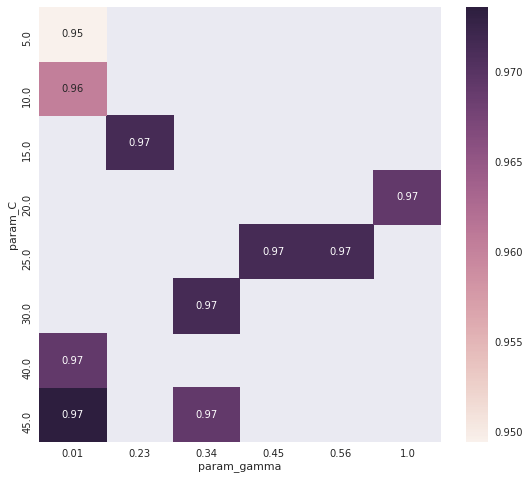

In [28]:
df = pd.DataFrame(rs.cv_results_)

# C와 gamma의 mean_test_score로 매트릭스 행렬 만들기
hm = df.pivot('param_C', 'param_gamma', 'mean_test_score')

# 히트맵 그리기
plt.figure(figsize = (9,8))
sns.heatmap(hm, annot = True)

- 정답률은 97.4%로 `GridSearchCV`에 비해 소폭 줄어들었음
- `RandomizedSearchCV`의 경우 10개의 조합만 무작위로 평가한 것을 확인 가능
- 단순 계산으로 시간은 `GridSearchCV`에 비해 1/9로 줄어들었다고 할 수 있음
- 이를 잘 활용하여 '시간 감소'와 '정답률 감소' 사이에 적당한 균형을 찾을 필요가 있음

___
> ## 번외. Grid Search with xgboost

In [29]:
from sklearn.ensemble import GradientBoostingClassifier

In [30]:
classifier = GradientBoostingClassifier()

In [31]:
params = {'learning_rate' : np.linspace(0.05, 0.5, 10),
         'max_depth': [2, 3, 4]}

rs = RandomizedSearchCV(classifier, params, n_iter = 5)

rs.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False),
          fit_params=None, iid=True, n_iter=5, n_jobs=1,
          param_distributions={'max_depth': [2, 3, 4], 'learning_rate': array([0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python3.5/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/envs/py3env/lib/python

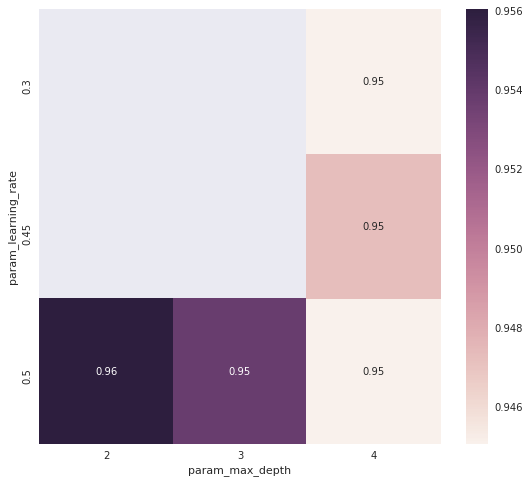

In [33]:
df = pd.DataFrame(rs.cv_results_)

# C와 gamma의 mean_test_score로 매트릭스 행렬 만들기
hm = df.pivot('param_learning_rate', 'param_max_depth', 'mean_test_score')

# 히트맵 그리기
plt.figure(figsize = (9,8))
sns.heatmap(hm, annot = True)